<a href="https://colab.research.google.com/github/DeboraID/BasicsTips-Links/blob/master/JoyTunes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Assigment
@JoyTunes

## Import packages

In [1]:
#import packeges 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


-------------------------


## Upload files 

In [2]:
from google.colab import files

uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Saving BI_Home_Assignment_SP_Funnels.csv to BI_Home_Assignment_SP_Funnels.csv
Saving BI_Home_Assignment_.docx to BI_Home_Assignment_.docx
Saving Table_1.png to Table_1.png


## Question number 1:

Following is the behavior of monthly subscribers retention by month. 
% retention means how many of the active subscriber renew their subscription on the Xth months (i.e. 70% of the subscribers renew on their first renewal date after one month, then 80% of the remaining will continue to renew on the 2nd month etc.)

A subscription price is $10/month.






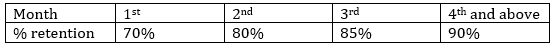

In [3]:
from IPython.display import Image
Image('Table_1.png')

### a)	Why do you think the 1st month retention is the lowest?

Is the first month free or the first basic sessions  free? ...so everyone starts with the lerning sessions until they need to pay, only the engaged people keep learning. It could be that the marketing dep should fine-tune the target population of the campaigns or the engagement of the first month / sessions should be improved.

### b)	What’s the average revenue from a subscriber during his 1st year of subscription?

if the first moth is free, then the average revenue from one subcriber will be :

month average = (10*11)/12  monthly.


### c)	Marketing dept. wants to run a campaign offering users just after they subscribe a 50% discount if they commit for a year. Would you advise for or against this plan?

I'll advise to do this discount during the first month subscription in order to improve the percent renew of this period or i'll give this ind of discound to the *regular users after seeing that their usage is going down

*Medium users = those ones that are more or less using the system during the first 3 month (for sure should be a way to try identify them based of their behavior)

##  Question number 2:
Given an sql table of soccer matches results, write an SQL query to construct the league standings. 

###Create Ranking tables by Pandas

In [4]:
####################Sorry a couldn't donwload any SQL plataform, 
####################so i'll create a pandas code and based on it the SQL query, 
####################Sorry in advance for the Spelling mistakes 

#create Soccer matches table by pandas
columns = ['HomeTeam' ,	'AwayTeam' ,	'HomeScore'	, 'AwayScore']
data = [['Argentina',	'Nigeria',	2	, 0 ],
            ['Germany' ,	'Japan',	1,	1 ], 
            ['Japan',	'Argentina',	0	,1], 
            ['Germany',	'Nigeria',	2	,3],
            ['Nigeria',	'Japan',	0	,0],
            ['Germany',	'Argentina',	1	,0]]

matches = pd.DataFrame(data,columns= columns)
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
HomeTeam     6 non-null object
AwayTeam     6 non-null object
HomeScore    6 non-null int64
AwayScore    6 non-null int64
dtypes: int64(2), object(2)
memory usage: 272.0+ bytes


Pointing rules:
-	Team gets 3 points for a win, 1 point for tie, 0 points for loss
-	Team positions determined by number of points, if tied position is determined by the better “goal difference” meaning Goals Scored minus Goals received. 

In [7]:
# adding points logict with python 

def calc (x,y):
    if x > y  :
        return 3
    elif  x == y:
        return 1
    else:
        return 0
    
matches['Hometeam_pointing']= matches.apply(lambda x: calc(x.HomeScore, x.AwayScore), axis=1)
matches['Awayteam_pointing']= matches.apply(lambda x: calc(x.AwayScore, x.HomeScore), axis=1)

matches


,HomeTeam,AwayTeam,HomeScore,AwayScore,Hometeam_scoring,Awayteam_scoring,Hometeam_pointing,Awayteam_pointing
0,Argentina,Nigeria,2,0,3,0,3,0
1,Germany,Japan,1,1,1,1,1,1
2,Japan,Argentina,0,1,0,3,0,3
3,Germany,Nigeria,2,3,0,3,0,3
4,Nigeria,Japan,0,0,1,1,1,1
5,Germany,Argentina,1,0,3,0,3,0


In [8]:
# creating views in order to calculate the total point per country

ranking= matches.groupby(['HomeTeam'])['Hometeam_pointing','HomeScore','AwayScore'].sum()
ranking_= matches.groupby(['AwayTeam'])['Awayteam_pointing','AwayScore','HomeScore'].sum()

ranking.rename(columns={'AwayScore':"Home_recieved"} ,inplace=True)
ranking_.rename(columns={'HomeScore':"Away_recieved"} ,inplace=True)


ranking_

,Awayteam_pointing,AwayScore,Away_recieved
AwayTeam,,,
Argentina,3,1,1
Japan,2,1,1
Nigeria,3,3,4


In [11]:
ranking['Awayteam_pointing']= 0
ranking['AwayScore']= 0
ranking['Away_recieved']= 0
ranking_.index.rename("HomeTeam" ,inplace=True)

ranking.update(ranking_)

ranking

,Hometeam_pointing,HomeScore,Home_recieved,Awayteam_pointing,AwayScore,Away_recieved,Scored,Received
HomeTeam,,,,,,,,
Argentina,3,2,0,3.0,1.0,1.0,3.0,1.0
Germany,4,4,4,0.0,0.0,0.0,4.0,4.0
Japan,0,0,1,2.0,1.0,1.0,1.0,2.0
Nigeria,1,0,0,3.0,3.0,4.0,3.0,4.0


In [14]:

ranking['Scored'] = ranking['AwayScore'] + ranking['HomeScore']
ranking['Received'] =ranking['Home_recieved'] + ranking['Away_recieved']
ranking['GoalDiff'] = ranking['Scored'] - ranking['Received'] 
ranking['Points'] = (ranking['Hometeam_pointing'] + ranking['Awayteam_pointing']).astype(int)

ranking.drop(columns=['Hometeam_pointing','HomeScore','Home_recieved','Awayteam_pointing','AwayScore','Away_recieved']).sort_values(by='Points', ascending=False)

,Scored,Received,GoalDiff,Points
HomeTeam,,,,
Argentina,3.0,1.0,2.0,6
Germany,4.0,4.0,0.0,4
Nigeria,3.0,4.0,-1.0,4
Japan,1.0,2.0,-1.0,2


###Create Ranking tables by SQL

In [0]:
# ######## create Ranking tables by SQL###########################################

# ### adding points to the matches table baesdd on the logic################
# Insert Into #matches
# Select 
#   (CASE 
#     WHEN HomeScore > AwayScore THEN 3
#     WHEN HomeScore = AwayScore THEN 1
#     ELSE 0) as Hometeam_pointing,
#     (CASE 
#     WHEN AwayScore > HomeScore THEN 3
#     WHEN HomeScore = AwayScore THEN 1
#     ELSE 0) as Awayteam_pointing
    
# FROM matches;

# ### creating temp talbes to calculate the total pointing per country#################


# Select HomeTeam as team , 
#       sum(Hometeam_pointing) as points,
#       sum(HomeScore) as scored,
#       sum(AwayScore) as recieved
# into #temp_ranking
# from matches
# Group by HomeTeam


# Select AwayTeam as team , 
#       sum(Awayteam_pointing) as points,
#       sum(AwayScore) as scored,
#       sum(HomeScore) as recieved
# into #temp_ranking_
# from matches
# Group by AwayTeam

# ##### create final table ##########################
# Select team,
#        sum(scored) as scored,
#        sum(recieved) as recieved,
#        (scored - recieved) as GoalDiff,
#        sum(points)        
# from (
#     select *
#     from #temp_ranking
#     union all
#     select *
#     from #temp_ranking_
#      ) t
# group by team



### adding points to the matches table based on the logic

Insert Into #matches

Select 

  (CASE 
  
    WHEN HomeScore > AwayScore THEN 3
    WHEN HomeScore = AwayScore THEN 1
    ELSE 0) as Hometeam_pointing,
   (CASE 
   
    WHEN AwayScore > HomeScore THEN 3
    WHEN HomeScore = AwayScore THEN 1
    ELSE 0) as Awayteam_pointing
    
FROM matches

###creating temp tables to calculate the total pointing per country


SELECT 

      HomeTeam as team , 
      sum(Hometeam_pointing) as points,
      sum(HomeScore) as scored,
      sum(AwayScore) as recieved
      
INTO #temp_ranking

FROM matches

Group by HomeTeam


SELECT 

      AwayTeam as team , 
      sum(Awayteam_pointing) as points,
      sum(AwayScore) as scored,
      sum(HomeScore) as recieved
      
INTO #temp_ranking_

FROM matches

Group by AwayTeam


### create final table 

SELECT

       team,
       sum(scored) as scored,
       sum(recieved) as recieved,
       (scored - recieved) as GoalDiff,
       sum(points)  
       
FROM (

    SELECT  *
    
    FROM #temp_ranking
    union all
    SELECT  *
    
    FROM #temp_ranking_
         ) t
         
group by team

##  Question number 3:

In the attached excel file are funnel figures on Simply Piano iOS, broken down by device type. The various steps of the funnel are explained in the file.

Look into the data, derive 1-2 key observations / questions

a)	For the product manager

b)	For the acquisition manager


Funnel steps explained:	


*   **new_users**	= Number of installations
*   **rp_users**	= Number of "Real Piano" users - meaning users that completed at list one level in the game using a real piano.
*   **rp_completed_pb1** = 	Number of real piano users that completed "Piano Basics 1". This is the free course given in the app, once completing 
	Piano Basics 1 users reach a paywall where are asked to purchase a subscription 
	The subscritption is yearly but also has a one week free trial period
*   **rp_started_trial**	 = Number of users that having finished Piano Basics 1 opted in to the free trial subscription
*   **rp_paying** = 	Number of users that successfully finished the free trial and became paying subscribers
*   **total_net_rev**	 = Total revenues from paying subscribers


In [98]:
data = pd.read_csv('BI_Home_Assignment_SP_Funnels.csv',  na_values = ['no info', '.'])
data = data.iloc[:,0:7]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
segmentation        27 non-null object
new_users           27 non-null int64
rp_users            27 non-null int64
rp_completed_pb1    27 non-null int64
rp_started_trial    27 non-null int64
rp_paying           27 non-null int64
total_net_rev       27 non-null object
dtypes: int64(5), object(2)
memory usage: 1.6+ KB


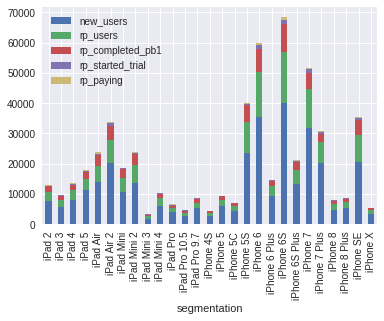

In [100]:
grpby_seg = data.groupby(['segmentation']).sum()

grpby_seg.plot.bar(stacked=True)


Conclusion for acq mng = take into account the devices that are new and having a very low qty of users in general, such as "IPhone 8" &  "IPhone 8 Plus"


In [110]:
### it seems that there is some kind of issue with the column's value = total_net_rev
###so i'm going to convert this string into a number

rev_num = data.drop(columns=['total_net_rev'])
rev_num['total_net_rev_num']= data['total_net_rev'].str.split(',').str.get(0).astype('float')*1000 +\
                          data['total_net_rev'].str.split(',').str.get(1).fillna(0).astype('float')#split the data 

rev_num.sort_values(by='total_net_rev_num')

,segmentation,new_users,rp_users,rp_completed_pb1,rp_started_trial,rp_paying,total_net_rev_num
21,iPhone 5C,4377,1754,946,47,22,1438.36
16,iPhone 5,5939,2166,1147,63,33,1891.04
26,iPad Mini 3,1856,803,506,85,57,3737.58
20,iPhone 8,4839,1980,866,187,90,5202.60
23,iPhone X,3564,1230,441,189,106,6791.53
18,iPhone 8 Plus,5465,2066,967,242,113,7769.31
12,iPhone 6 Plus,9211,3292,1718,290,150,8906.62
24,iPad Pro 10.5,2842,1007,590,221,151,9699.68
14,iPad 2,7648,2977,1868,242,152,10241.96
15,iPad Mini 4,6132,2408,1393,245,171,11280.91


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fccaae7efd0>,
      dtype=object)

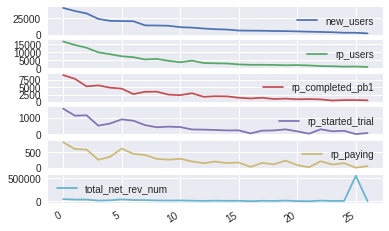

In [120]:
rev_num.plot(subplots =True, legend =True)

In [121]:
rev_num.iloc[25:26]

,segmentation,new_users,rp_users,rp_completed_pb1,rp_started_trial,rp_paying,total_net_rev_num
25,iPhone 4S,2782,1062,605,23,9,553950.0


Conclusion for prd mng = they are very old users or the owner of the company found a good way to increa the expences ...(just joking :) )